In [2]:
import os
import pandas as pd
output_dir = "mort_output"
dat_train = pd.read_csv(os.path.join(output_dir, 'train_set.csv'))
dat_expl = pd.read_csv(os.path.join(output_dir, 'validation_set.csv'))

y_name = 'label'
from ShapleyVIC import model
model_object = model.models(
    x=dat_train.drop(columns=[y_name]), y=dat_train[y_name], 
    outcome_type="binary", output_dir=output_dir
)

In [3]:
dat_expl.shape

(2000, 22)

In [4]:
model_object.model_optim.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,1.2852,3.278,0.392,0.695,-5.140,7.710
Vital_A,0.0343,0.003,11.865,0.000,0.029,0.040
Vital_B,-0.0260,0.004,-6.186,0.000,-0.034,-0.018
Vital_C,-0.0547,0.008,-6.604,0.000,-0.071,-0.038
Vital_D,0.0564,0.010,5.402,0.000,0.036,0.077
Vital_E,0.1379,0.011,12.914,0.000,0.117,0.159
Vital_F,-0.1698,0.067,-2.542,0.011,-0.301,-0.039
Vital_G,-0.0045,0.019,-0.237,0.812,-0.042,0.033
Lab_A,0.0018,0.001,2.001,0.045,3.74e-05,0.004
Lab_B,0.0988,0.024,4.042,0.000,0.051,0.147


In [5]:
u1, u2 = model_object.init_hyper_params()
(u1, u2)

(0.5, 15.625)

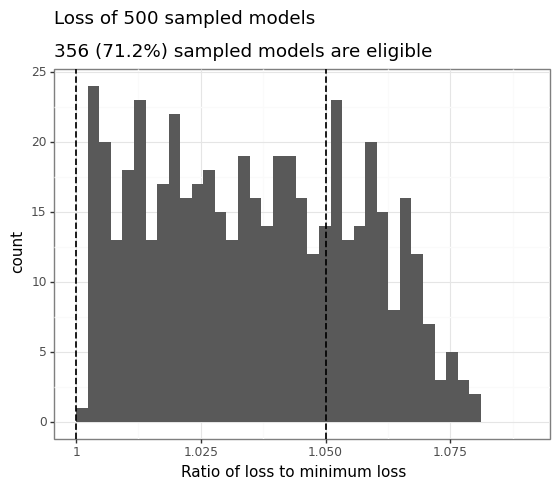

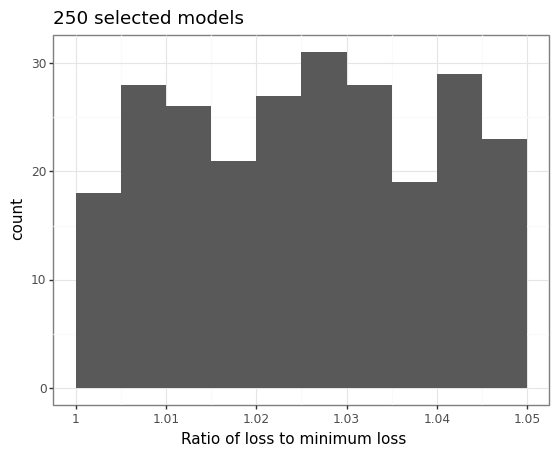

(<ggplot: (196488993958)>, <ggplot: (196488993901)>)

In [6]:
model_object.draw_models(u1=u1, u2=u2, m=500, n_final=250)
model_object.models_plot

In [7]:
from ShapleyVIC import compute
m_svic = compute.compute_shapley_vic(
    model_obj=model_object, 
    x_expl=dat_expl.drop(columns=[y_name]), y_expl=dat_expl[y_name], 
    n_cores=25, threshold=0.05
)

ShapleyVIC:   0%|          | 0/250 [00:00<?, ?it/s]

Using 25 cores in parallel computing.



[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done 150 tasks      | elapsed: 665.0min

100%|██████████| 250/250 [17:11:28<00:00, 247.55s/it] 1031.5min finished


Program finished in 17.1912624108889 hours
